# Exercise - Investigate High Paying Skills

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [9]:
df_DE_ger = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'Germany')].copy()
df_DE_ger['job_title_short'].value_counts()


job_title_short
Data Engineer    6675
Name: count, dtype: int64

In [8]:
df_DE_ind = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'India')].copy()
df_DE_ind['job_title_short'].value_counts()


job_title_short
Data Engineer    19062
Name: count, dtype: int64

In [10]:
df_DE_usa = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'United States')].copy()
df_DE_usa['job_title_short'].value_counts()

job_title_short
Data Engineer    35080
Name: count, dtype: int64

In [11]:
df_DE_usa = df_DE_usa.dropna(subset=['salary_year_avg'])

In [12]:
df_DE_usa = df_DE_usa.explode('job_skills')
df_DE_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,sql,"{'programming': ['sql', 'python']}"
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,python,"{'programming': ['sql', 'python']}"
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,golang,"{'libraries': ['hadoop', 'spark'], 'programmin..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,scala,"{'libraries': ['hadoop', 'spark'], 'programmin..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,python,"{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,alteryx,"{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,power bi,"{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,tableau,"{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,qlik,"{'analyst_tools': ['alteryx', 'power bi', 'tab..."


In [ ]:

df_USA_group = df_DE_usa.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_USA_highestPay = df_USA_group[df_USA_group['count'] >= 10].sort_values(by='median', ascending=False).head(10)
df_USA_highestPay


df_USA_skills = df_USA_group.sort_values(by='count', ascending=False).head(10)
df_USA_skills

,count,median
job_skills,,
sql,2110,125000.00000
python,2007,127794.50000
aws,1313,131000.00000
spark,968,137410.15625
azure,961,125000.00000
snowflake,765,130700.00000
java,732,137000.00000
kafka,536,145000.00000
nosql,519,140000.00000


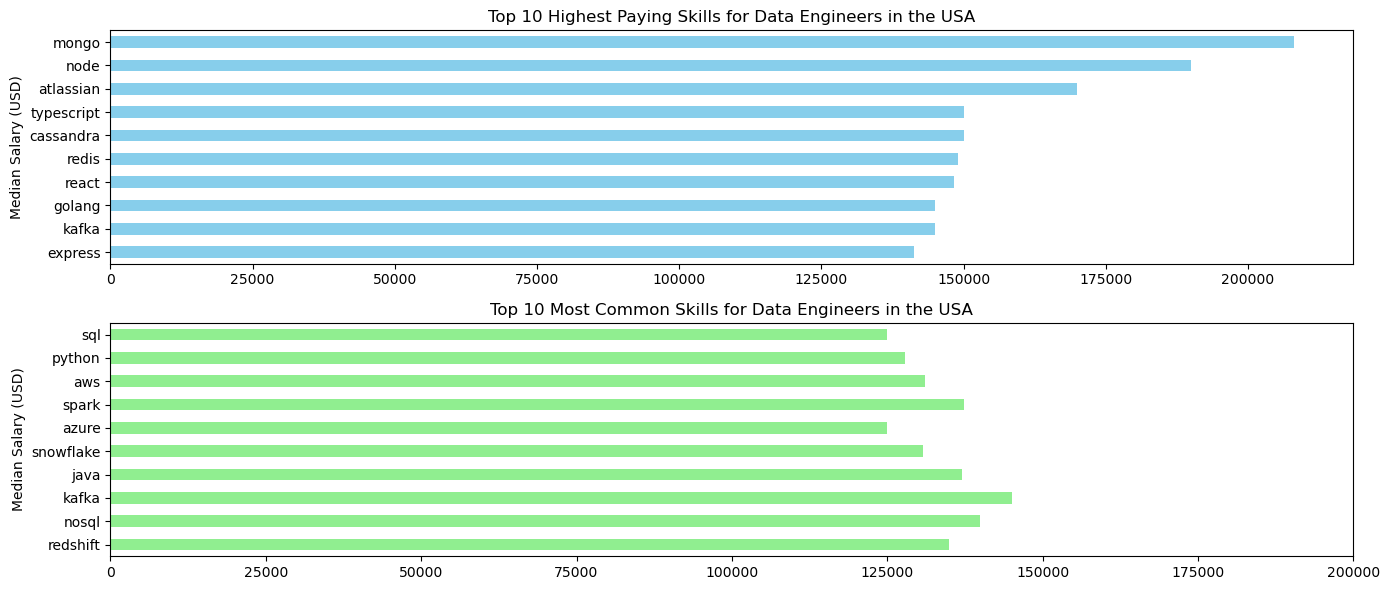

In [ ]:


fig, ax = plt.subplots(2, 1, figsize=(14, 6))


df_USA_highestPay[::-1].plot(kind='barh', y='median', ax=ax[0], color='skyblue', legend=False)
ax[0].set_title('Top 10 Highest Paying Skills for Data Engineers in the USA')
ax[0].set_ylabel('Median Salary (USD)')
# ax[0].tick_params(axis='x', rotation=45)


df_USA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], color='lightgreen', legend=False)
ax[1].set_title('Top 10 Most Common Skills for Data Engineers in the USA')
ax[1].set_ylabel('Median Salary (USD)')
ax[1].set_xlim(0, 200000)
# ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()